<a href="https://colab.research.google.com/github/Soniprincy/Netflix-Movie-Recommendation/blob/main/netflix_by_princy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt', header=None, names=['cust_id', 'rating'], usecols=[0, 1])

In [4]:
df.head()

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
df.columns

Index(['cust_id', 'rating'], dtype='object')

In [6]:
df

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [7]:
df.isna().sum()

cust_id       0
rating     4499
dtype: int64

In [8]:
df.dtypes

cust_id     object
rating     float64
dtype: object

In [9]:
movie_count = df['rating'].isna().sum()
movie_count

4499

In [10]:
# substracting numm values of movies to find exact customer count.

cust_count = df['cust_id'].nunique()
cust_count = cust_count - movie_count
cust_count

470758

In [11]:
stars = df.groupby('rating')['rating'].agg(['count'])
stars

,count
rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


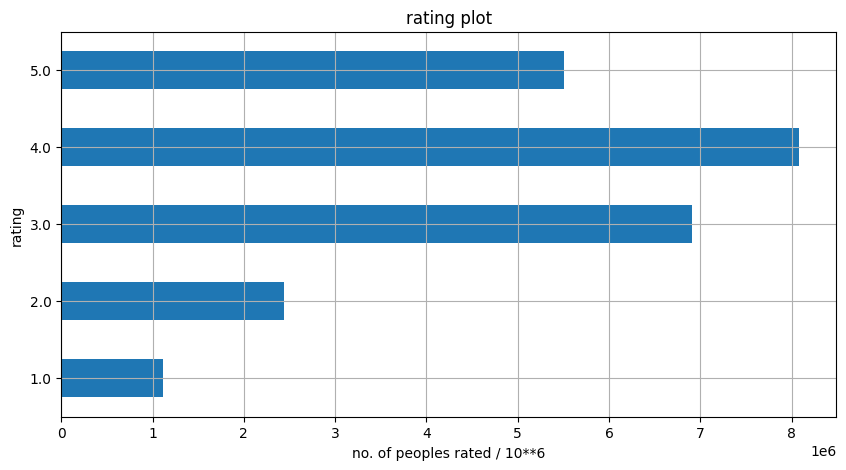

In [12]:
stars.plot(kind = 'barh', legend = False, figsize = (10,5))
plt.title('rating plot')
plt.xlabel('no. of peoples rated / 10**6')
plt.grid(True)

In [13]:
movie = None
movie_id = []
for id in df['cust_id']:
    if ':' in id:
        movie = int(id.replace(':',' '))
        movie_id.append(np.nan)
    else:
        movie_id.append(movie)


In [14]:
df['movie_id'] = movie_id

In [15]:
df

,cust_id,rating,movie_id
0,1:,NaN,NaN
1,1488844,3.0,1.0
2,822109,5.0,1.0
3,885013,4.0,1.0
4,30878,4.0,1.0
...,...,...,...
24058258,2591364,2.0,4499.0
24058259,1791000,2.0,4499.0
24058260,512536,5.0,4499.0
24058261,988963,3.0,4499.0


In [16]:
df.isna().sum()

cust_id        0
rating      4499
movie_id    4499
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

cust_id     0
rating      0
movie_id    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   object 
 1   rating    float64
 2   movie_id  float64
dtypes: float64(2), object(1)
memory usage: 734.1+ MB


In [20]:
df['cust_id'] = df['cust_id'].astype('int')
df['rating'] = df['rating'].astype('int')
df['movie_id'] = df['movie_id'].astype('int')

In [21]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   cust_id   int64
 1   rating    int64
 2   movie_id  int64
dtypes: int64(3)
memory usage: 734.1 MB


In [22]:
movie_summary = df.groupby('movie_id')['rating'].agg(['count'])

In [23]:
movie_summary

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


## Bench Mark -- 60%

In [24]:
benchmark = round(movie_summary['count'].quantile(0.6),0)
benchmark

908.0

In [56]:
drop_list = movie_summary[movie_summary['count']<benchmark].index
drop_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=2699)

In [57]:
len(drop_list)

2699

In [58]:
user_summary = df.groupby('cust_id')['rating'].agg(['count'])

In [59]:
user_summary

,count
cust_id,
6,148
7,192
10,49
42,35
59,49
...,...
2649375,36
2649378,70
2649388,77


In [60]:
cust_benchmark = round(user_summary['count'].quantile(0.6),0)

In [61]:
drop_cust = user_summary[user_summary['count']<cust_benchmark].index
drop_cust

Index([     10,      42,      59,      87,     116,     131,     169,     183,
           192,     195,
       ...
       2649328, 2649331, 2649335, 2649336, 2649370, 2649375, 2649378, 2649388,
       2649426, 2649429],
      dtype='int64', name='cust_id', length=112970)

In [62]:
len(drop_cust)

112970

In [63]:
df = df[~df['movie_id'].isin(drop_list)]

In [64]:
df = df[~df['cust_id'].isin(drop_cust)]

In [65]:
df.shape

(13196521, 3)

In [35]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357250 sha256=8d6157e08680bea2fcb42cdc980681b2bdf3f076d867d4acf68f076c3cd7b126
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [66]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [67]:
reader = Reader()

In [68]:
data = Dataset.load_from_df(df[['cust_id', 'movie_id', 'rating']][:100000], reader)

In [69]:
data

In [70]:
model = SVD()

In [71]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5)

{'test_rmse': array([0.99203177, 0.99987253, 0.987252  , 0.99152371, 0.98783705]),
 'test_mae': array([0.79855041, 0.80168292, 0.78837783, 0.79075595, 0.79872676]),
 'fit_time': (2.6682426929473877,
  2.2227232456207275,
  1.8933186531066895,
  1.8604974746704102,
  1.8712682723999023),
 'test_time': (0.2344217300415039,
  0.1300504207611084,
  0.1386275291442871,
  0.12798500061035156,
  0.3741648197174072)}

In [72]:
df.head()

,cust_id,rating,movie_id
696,712664,5,3
697,1331154,4,3
701,439011,1,3
703,1644750,3,3
704,2031561,4,3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13196521 entries, 696 to 24056846
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   cust_id   int64
 1   rating    int64
 2   movie_id  int64
dtypes: int64(3)
memory usage: 402.7 MB


In [74]:
title = pd.read_csv('/content/drive/MyDrive/movie_titles.csv', encoding='ISO-8859-1', header=None, names=['movie_id', 'year', 'name'],usecols=[0,1,2])

In [75]:
title.head()

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [76]:
df.head()

,cust_id,rating,movie_id
696,712664,5,3
697,1331154,4,3
701,439011,1,3
703,1644750,3,3
704,2031561,4,3


In [77]:
user_1331154 = title.copy()
user_1331154.head()

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [78]:
drop_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=2699)

In [79]:
user_1331154 = user_1331154[~user_1331154['movie_id'].isin(drop_list)]
user_1331154

,movie_id,year,name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [85]:
user_1331154['estimate score'] = user_1331154['movie_id'].apply(lambda x : model.predict(1331154,x).est)

In [86]:
user_1331154.head()

,movie_id,year,name,estimate score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.652146
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.373119
2,3,1997.0,Character,4.145776
7,8,2004.0,What the #$*! Do We Know!?,3.847180
4,5,2004.0,The Rise and Fall of ECW,3.773560


In [87]:
user_1331154 = user_1331154.sort_values('estimate score', ascending=False)

In [88]:
user_1331154.head(5)

,movie_id,year,name,estimate score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.652146
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.373119
2,3,1997.0,Character,4.145776
7,8,2004.0,What the #$*! Do We Know!?,3.847180
4,5,2004.0,The Rise and Fall of ECW,3.773560
